Kaggle Competition: House Price Regression
For this competiton, we are given a data set of 1,460 homes, each with a few dozen features of types: float, integer, and categorical. We are tasked with building a regression model to estimate a home's sale price. 
Link:https://www.kaggle.com/adachowicz/house-prices-random-forest-regression-analysis

In [108]:
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,f1_score
from pandas.api.types import is_string_dtype,is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [109]:
%pwd

'D:\\Information system\\Sem 1\\Info 6105\\Assignment 2'

In [110]:
df = pd.read_csv(r'D:\\Information system\\Sem 1\\Info 6105\\Assignment 2\\train.csv')

In [111]:
cols = list(df.columns)

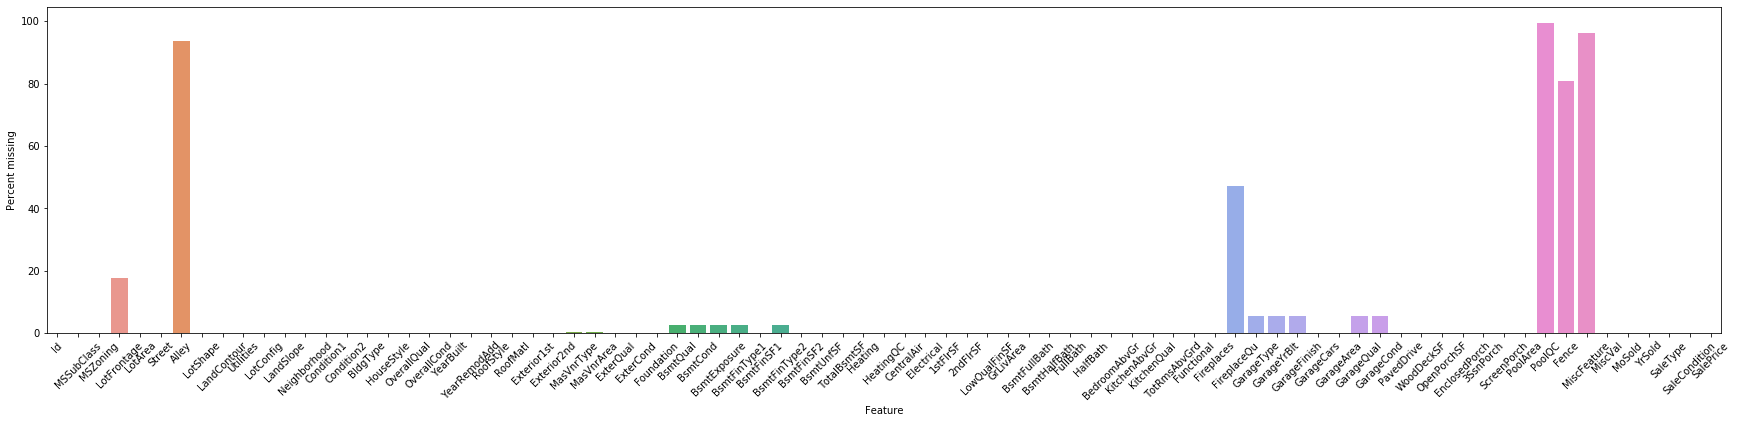

In [112]:
null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (30,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [113]:
#Checking the sum of null values for each values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Preprocessing the Data

In [114]:
# pre defined function for preprocessing the data
# to convert catagorical values and to calcuale mean

def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df
def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [115]:
def split_df(df,num):
    return df[ :num].copy(),df[num: ].copy()

def my_rmse(y1,y2):
    return np.sqrt(((y1-y2)**2).mean())

In [116]:
#funtion implementation
df_1 = str_to_cat(df)
df_2,my_table = mydf_preprocessor(df_1,null_table = None)
df_2.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,1,60,4,65.0,8450,2,0,4,4,1,...,0,0,2,2008,9,5,208500,False,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,0,0,5,2007,9,5,181500,False,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,0,0,9,2008,9,5,223500,False,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,0,0,2,2006,9,1,140000,False,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,0,0,12,2008,9,5,250000,False,False,False


In [117]:
print(df_2.shape)

(1460, 84)


In [118]:
my_table

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1980.0}

In [119]:
#sales price is the value to be calculated
x = df_2.drop('SalePrice', axis=1)
y = df_2['SalePrice']
print(x.shape)
print(y.shape)

(1460, 83)
(1460,)


In [120]:
# spliting the data to for training and validation data set
x_trn,x_val = split_df(x,730)
y_trn,y_val = split_df(y,730)
print(x_trn.shape,x_val.shape,y_trn.shape,y_val.shape)

(730, 83) (730, 83) (730,) (730,)


# Run the Random Tree Regressor

In [121]:
model = RandomForestRegressor(n_jobs = -1,oob_score = False,n_estimators = 10,
                                   max_depth = 40000,min_samples_leaf = 25)
model.fit(x_trn,y_trn)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40000, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=25,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [122]:
#Run the model for the Validation set
y_val_pred = model.predict(x_val)

In [123]:
# Check the R2 Score
from sklearn.metrics import r2_score

r2 = r2_score(y_val, y_val_pred)
r2

0.7383519362698034

In [124]:
#Checking the RMSE value for the Validation set
my_rmse(y_val,y_val_pred)

39319.14877934912

# Feature Importance Calculation

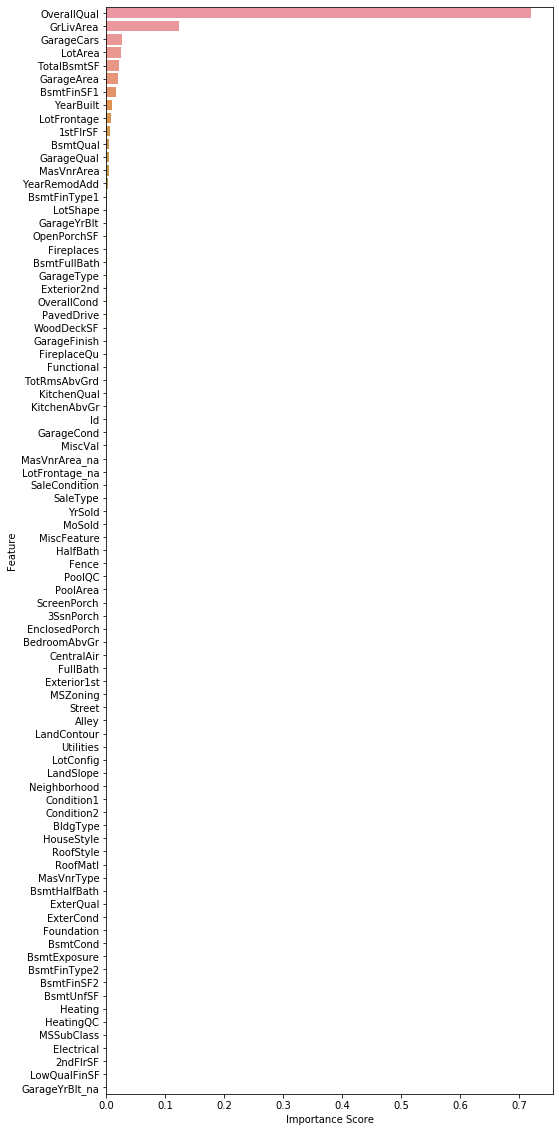

In [125]:
# After training the data set feature importance is calculated 
'''Calculate feature importance scores with your model'''

feat_imps = pd.DataFrame(model.feature_importances_, index = x_trn.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (8,20))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")


In [126]:
''' From the feature importance scores a new data frame is formed to calculate the accuracy on the validation dataset'''

df_3 = df_2[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','BsmtQual',
                     'GarageArea','LotArea','1stFlrSF','YearBuilt','BsmtFinSF1','LotShape','LotFrontage','SalePrice']]

In [127]:
df_3.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,BsmtQual,GarageArea,LotArea,1stFlrSF,YearBuilt,BsmtFinSF1,LotShape,LotFrontage,SalePrice
0,7,1710,2,856,2,3,548,8450,856,2003,706,4,65.0,208500
1,6,1262,2,1262,2,3,460,9600,1262,1976,978,4,80.0,181500
2,7,1786,2,920,2,3,608,11250,920,2001,486,1,68.0,223500
3,7,1717,3,756,1,4,642,9550,961,1915,216,1,60.0,140000
4,8,2198,3,1145,2,3,836,14260,1145,2000,655,1,84.0,250000


In [128]:
#sales price is the value to be calculated
x_feat_imp = df_3.drop('SalePrice', axis=1)
y_feat_imp = df_3['SalePrice']
print(x_feat_imp.shape)
print(y_feat_imp.shape)

(1460, 13)
(1460,)


In [129]:
#Splitting the data to form train and validation datasets
def split_df(df,num):
    return df[ :num].copy(),df[num: ].copy()


x_trn_1,x_val_1 = split_df(x_feat_imp,730)
y_trn_1,y_val_1 = split_df(y_feat_imp,730)
print(x_trn_1.shape,x_val_1.shape,y_trn_1.shape,y_val_1.shape)
print(y_trn_1.head(5))
print(y_val_1.head(5))

(730, 13) (730, 13) (730,) (730,)
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
730    236500
731    187500
732    222500
733    131400
734    108000
Name: SalePrice, dtype: int64


Model implimentation after feature importance

In [130]:
model_1 = RandomForestRegressor(n_jobs = -1,oob_score = False,n_estimators = 10,
                                   max_depth = 40000,min_samples_leaf = 25)
model_1.fit(x_trn_1,y_trn_1)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40000, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=25,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [131]:
y_val_pred_1 = model_1.predict(x_val_1)
print(x_val_1.shape)
y_val_pred_1.shape

(730, 13)


(730,)

In [132]:
from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_val_pred)
r2

0.7383519362698034

In [133]:
rmse1=my_rmse(y_val_1,y_val_pred_1)
rmse

37954.43499492911

# Check the model for the Test Data

In [134]:
'''Read in test data'''
df_test = pd.read_csv(r'D:\\Information system\\Sem 1\\Info 6105\\Assignment 2\\test.csv')
df_test.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Util

In [135]:
#funtion implementation
df_test_1 = str_to_cat(df_test)
df_test_2,my_table = mydf_preprocessor(df_test_1,null_table = None)
df_test_2.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MasVnrArea_na,BsmtFinSF1_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,BsmtFullBath_na,BsmtHalfBath_na,GarageYrBlt_na,GarageCars_na,GarageArea_na
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,False,False,False,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,False,False,False,False,False


In [136]:
''' From the feature importance scores a new data frame is formaed to calculate the accuracy on the validation dataset'''

df_test_3 = df_test_2[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','BsmtQual',
                     'GarageArea','LotArea','1stFlrSF','YearBuilt','BsmtFinSF1','LotShape','LotFrontage']]
df_test_3.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,BsmtQual,GarageArea,LotArea,1stFlrSF,YearBuilt,BsmtFinSF1,LotShape,LotFrontage
0,5,896,1.0,882.0,1,4,730.0,11622,896,1961,468.0,4,80.0
1,6,1329,1.0,1329.0,1,4,312.0,14267,1329,1958,923.0,1,81.0
2,5,1629,2.0,928.0,2,3,482.0,13830,928,1997,791.0,1,74.0
3,6,1604,2.0,926.0,2,4,470.0,9978,926,1998,602.0,1,78.0
4,8,1280,2.0,1280.0,2,3,506.0,5005,1280,1992,263.0,1,43.0


In [137]:
'''Predictions for the test set'''
y_test_pred = model_1.predict(df_test_3)
#print(df_test_3)
print(y_test_pred)
y_test_pred.shape

[128927.90985476 157864.07445354 184353.52777266 ... 145330.69626545
 121154.92915277 251071.74218726]


(1459,)